## Data Preparation of 2D images

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import os
import matplotlib.pyplot as plt

import xyimg.dataprep as dp
import xyimg.extana   as extana
#import xyimg.cnn      as cnn


## Test

In [3]:
path = os.environ['LPRDATADIR']
extana.tests(path)

Passed all tests!


True

## Read voxels and inspect an event

In [34]:
pressure     = '13bar'
radius       = 12
samples      = ['1eroi', '0nubb']
get_filename = lambda sample, radius, pressure: path + dp.str_concatenate(('extana/extana', pressure, sample, 'radius'+str(radius))) + '.h5'
ifilenames   = [get_filename(sample, radius, pressure) for sample in samples]
print(ifilenames)
data         = [pd.read_hdf(ifile, "df") for ifile in ifilenames]

['/scratch/next/data/NEXT100/pressure_topology/extana/extana_13bar_1eroi_radius12.h5', '/scratch/next/data/NEXT100/pressure_topology/extana/extana_13bar_0nubb_radius12.h5']


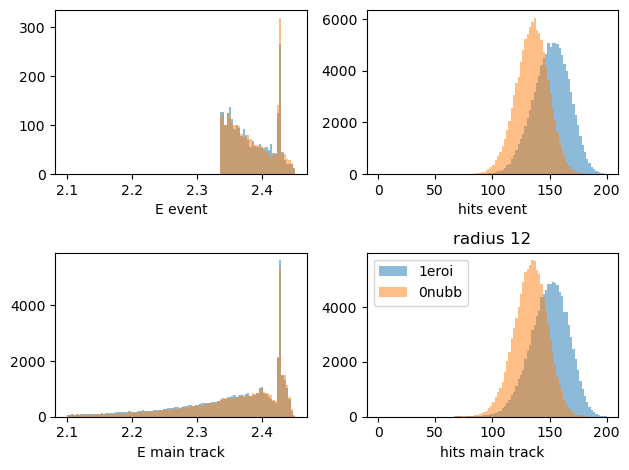

In [5]:
def plot_general(data, ene_range, hits_range, nbins = 100):
    for label, idata in zip(samples, data):
        plt.subplot(2, 2, 1); plt.hist(idata.evtene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E event');
        plt.subplot(2, 2, 2); plt.hist(idata.evtnhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits event');
        plt.subplot(2, 2, 3); plt.hist(idata.trkene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E main track');
        plt.subplot(2, 2, 4); plt.hist(idata.trknhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits main track');
        plt.legend(); plt.title('radius ' + str(radius)); plt.tight_layout()

plot_general(data, (2.1, 2.45), (50, 200))

In [30]:
def roc(data, ene_range, nbins = 200):
    yy = [np.histogram(idata.blob2ene, range = ene_range, bins = nbins, density = True)[0] for idata in data]
    ys = [np.cumsum(y)/np.sum(y) for y in yy]
    ys = [ys[0], 1 - ys[1]]
    return ys

In [28]:
def plot_ext(data, ene_range, hits_range, nbins = 100):
    for label, idata in zip(samples, data):
        plt.subplot(2, 2, 1); plt.hist(idata.blob1ene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E ext1');
        plt.subplot(2, 2, 2); plt.hist(idata.blob1nhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits ext1');
        plt.subplot(2, 2, 3); plt.hist(idata.blob2ene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E ext2');
        plt.subplot(2, 2, 4); plt.hist(idata.blob2nhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits ext2');
    plt.legend(); plt.title('radius ' + str(radius)); plt.tight_layout()


Text(0.5, 1.0, '13bar - 6 mm')

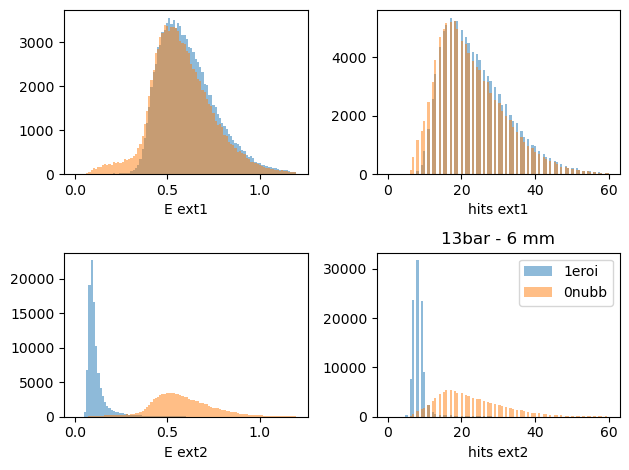

In [70]:
filenames = [get_filename(sample, 6, '13bar') for sample in samples]
data      = [pd.read_hdf(ifile, "df") for ifile in filenames]
plot_ext(data, (0, 1.2), (0, 60), 100)
plt.title('13bar - 6 mm')

Text(0.5, 1.0, '2bar, radius 12')

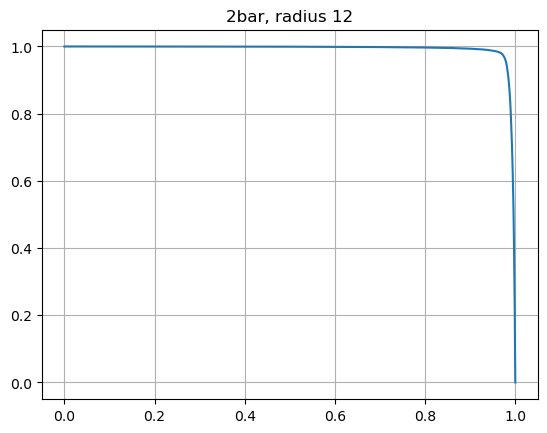

In [64]:
filenames = [get_filename(sample, 6, 5bar) for sample in samples]
datas     = [[pd.read_hdf(ifile, "df") for ifile in files] for files in filenames
ys = roc(data, (0., 2.), 200)
plt.plot(*ys); plt.grid(); plt.title(pressure + ', radius ' + str(radius))

In [60]:
pressure = '2bar'
radii     = (6, 12, 18, 24, 30)
samples   = ('1eroi', '0nubb')
filenames = [[get_filename(sample, radius, pressure) for sample in samples] for radius in radii]
datas     = [[pd.read_hdf(ifile, "df") for ifile in files] for files in filenames]

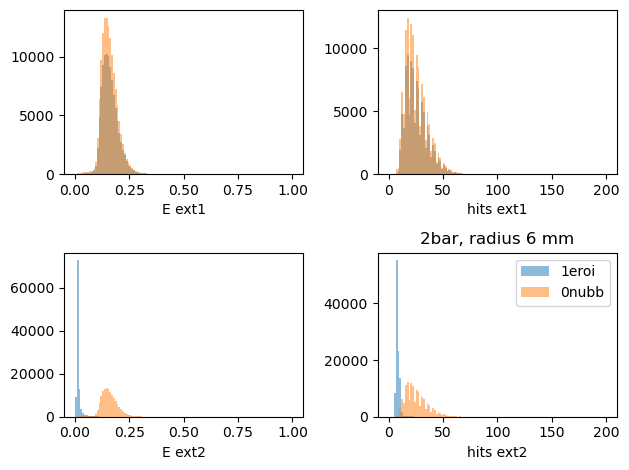

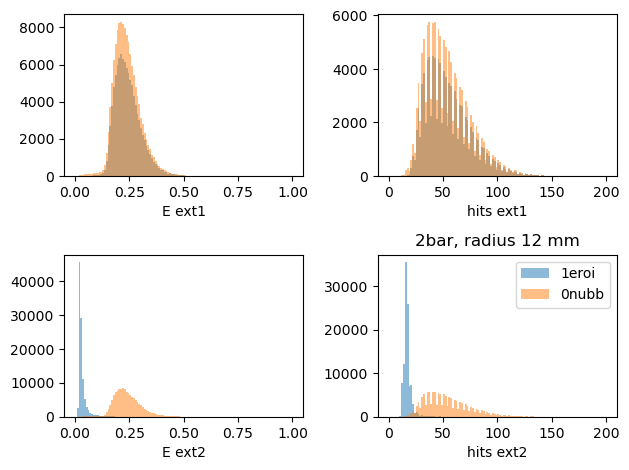

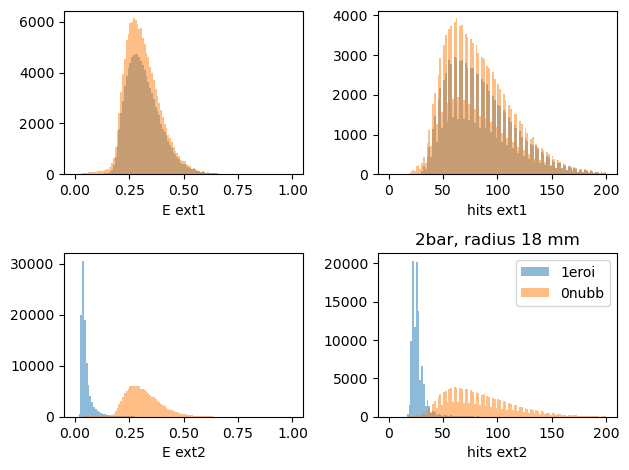

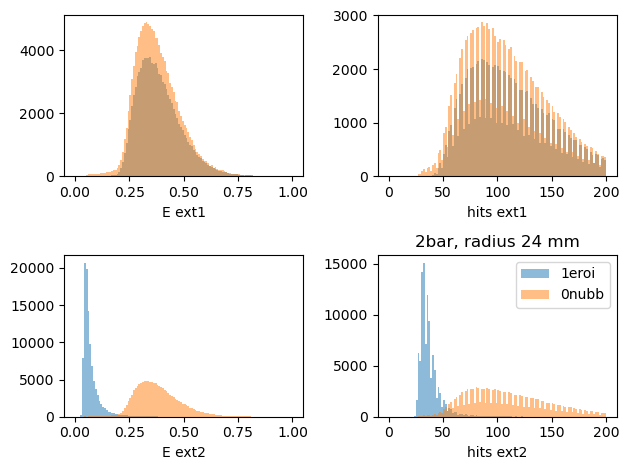

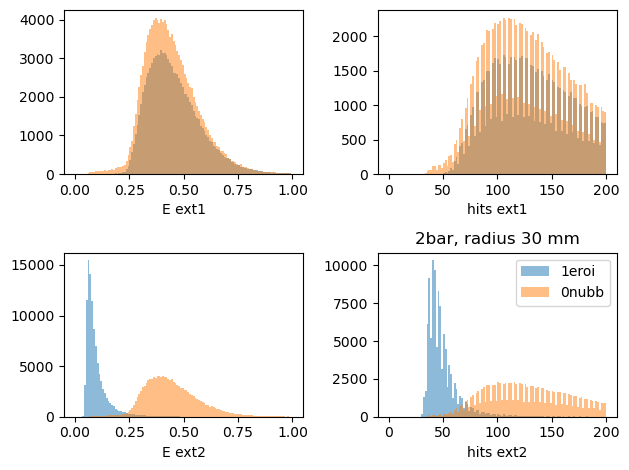

In [62]:
for i, data in enumerate(datas):
    plt.figure()
    plot_ext(data, (0, 1.), (0, 200), 120)
    plt.title(pressure + ', radius ' + str(radii[i])+ ' mm')

Text(0.5, 1.0, '2bar')

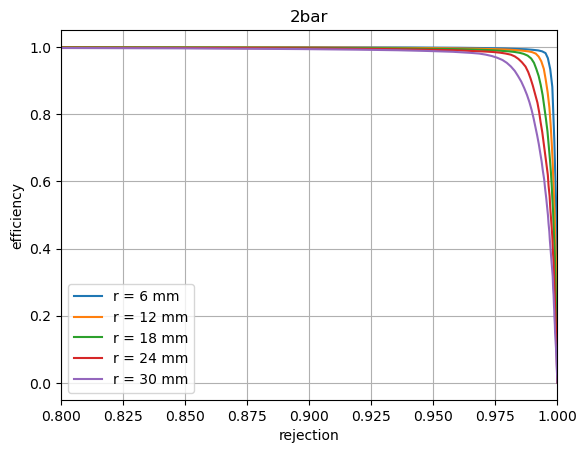

In [63]:
ys = [roc(data, (0., 3.), 400) for data in datas]
for i, y in enumerate(ys):
    plt.plot(*y, label = 'r = ' + str(radii[i]) + ' mm')
plt.grid()
plt.xlabel('rejection'); plt.ylabel('efficiency')
plt.legend(); plt.xlim((0.8, 1.)); plt.title(pressure)

In [47]:
dd

{'file_id': 1,
 'event': 2,
 'evtene': 2.4578302097827134,
 'evthits': 427,
 'trkene': 2.3150225729645797,
 'trkhits': 422}

In [ ]:
i1  = extana._blob_index(evt, 1)
x1  = extana._voxel_position(evt, i1)
print(i1, x1)
i2  = extana._blob_index(evt, 2)
x2 = extana._voxel_position(evt, i2)
print(i2, x2)

5 [421 206 455]
280 [463 256 408]


In [ ]:
radius = 18.
i      = 2
x, y, z = extana._voxel_position(evt, i)
dx, dy, dz = evt.x.values - x, evt.y.values - y, evt.z.values - z
dd  = np.sqrt(dx*dx + dy*dy + dz*dz)
sel = dd <= radius
ene = np.sum(evt.E[sel])
print(len(sel), sum(sel))
print(ene)


427 5
0.1428076368181337
